In [1]:
import os
import glob

import spacy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
en = spacy.load('en_core_web_sm')

In [3]:
DATASETS_HOME = '../datasets'

train_df = pd.read_csv(os.path.join(DATASETS_HOME, 'home-depot/train.csv'))
train_df.describe()

,id,product_uid,relevance
count,74067.000000,74067.000000,74067.000000
mean,112385.709223,142331.911553,2.381634
std,64016.573650,30770.774864,0.533984
min,2.000000,100001.000000,1.000000
25%,57163.500000,115128.500000,2.000000
50%,113228.000000,137334.000000,2.330000
75%,168275.500000,166883.500000,3.000000
max,221473.000000,206650.000000,3.000000


In [4]:
train_df.head()

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ..."
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ..."
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...


In [5]:
min_rel, max_rel = train_df['relevance'].min(), train_df['relevance'].max()
print(min_rel, max_rel)

1.0 3.0


In [6]:
X = train_df[['product_title', 'search_term', 'product_description']] 
y = train_df['relevance']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,)

In [8]:
def preprocess(text):
    # TODO:
    # remove punctuation
    # try spacy stopwords, or something else
    
    return text


# TODO: Try BM25


tfidf_model = TfidfVectorizer(
    strip_accents='ascii',
    max_df=0.95,
    min_df=0.01,
    max_features=5000
).fit(X_train['product_description'])

In [9]:
def cosim(queries, candidates):
    return cosine_similarity(queries, candidates)

In [10]:
def change_pred_range(pred, low=1.0, high=3.0):
    return pred / pred.max() * (high-low) + low

In [11]:
# MSE
def mse(pred, target):
    return np.mean((pred.diagonal() - target) ** 2)

In [12]:
# when using product title; train set
k = 5000

tfidf_candidates = tfidf_model.transform(X_train['product_description'])[:k]
tfidf_queries = tfidf_model.transform(X_train['product_title'])[:k]
y_pred = cosim(tfidf_queries, tfidf_candidates)

y_pred = change_pred_range(y_pred)
mse(y_pred, y_train[:k])

0.7910622175629098

In [13]:
# when using product title; test set
k = 5000

tfidf_candidates = tfidf_model.transform(X_test['product_description'])[:k]
tfidf_queries = tfidf_model.transform(X_test['product_title'])[:k]
y_pred = cosim(tfidf_queries, tfidf_candidates)

y_pred = change_pred_range(y_pred)
mse(y_pred, y_test[:k])

0.7596558702564468

In [14]:
# when using search term; train set
k = 5000

tfidf_candidates = tfidf_model.transform(X_train['product_description'])[:k]
tfidf_queries = tfidf_model.transform(X_train['search_term'])[:k]
y_pred = cosim(tfidf_queries, tfidf_candidates)

y_pred = change_pred_range(y_pred)
mse(y_pred, y_train[:k])

1.4188541179110097

In [15]:
# when using search term; test set
k = 5000

tfidf_candidates = tfidf_model.transform(X_test['product_description'])[:k]
tfidf_queries = tfidf_model.transform(X_test['search_term'])[:k]
y_pred = cosim(tfidf_queries, tfidf_candidates)

y_pred = change_pred_range(y_pred)
mse(y_pred, y_test[:k])

1.3966599556796269

In [16]:
# visual inspection of quality
# randomly sample about 20 examples

k = 20

idxs = np.random.randint(0, len(X_test), size=(k,))
X_test.iloc[idxs][['product_title', 'search_term', 'product_description']]

,product_title,search_term,product_description
37699,6.5 ft. Verde Spruce Artificial Christmas Tree...,douglas fur fake christmas trees,Enhance your living area this holiday season w...
59577,Trewax 12.35 oz. Paste Wax Clear Can (2-Pack),nonslip floor wax,"Made with natural Brazilian carnauba wax, Trew..."
14859,Hampton Bay Welton 34 in. Round Cauldron Fire Pit,fire bowl,Add a touch of elegant warmth to your outdoor ...
28797,Everbilt 11 in. Black Gate Spring,cant slam gate closer,The Everbilt 11 in. Black Gate Spring features...
36814,JAG PLUMBING PRODUCTS MOEN Posi-Temp Shower Ha...,shower plumbing,Repair your MOEN brand Posi-Temp model shower ...
62911,Night Owl 1000 ft. 18 AWG In-Wall Fire Rated C...,fire rated buildng materials,Night Owl's CAB-RG59W-1000VP is 1000 ft. of in...
71408,International Concepts 36 in. High Solid Paraw...,solid wood cabinet formica tabletop,This cabinet has a ton of storage room and can...
53734,Vortex 4 in. Powerfan Inline Duct Fan,in line fan,"Manufactured in Canada, the Vortex Powerfans I..."
62888,Illumine 1 Light Whispering Pines Mini Pendant...,whispering pine 2'x3.5',The Meyda Tiffany brand is inspired by the Ita...
53000,Husky 18 in. x 100 in. Premium Solid Drawer Li...,portable tool storage,The Husky Multi-Purpose Premium Solid Drawer L...


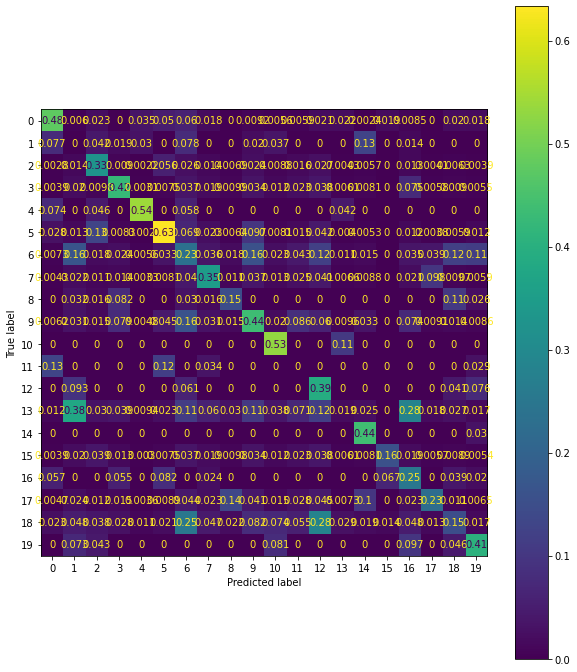

In [17]:
tfidf_candidates = tfidf_model.transform(X_test.iloc[idxs]['product_description'])
tfidf_queries = tfidf_model.transform(X_test.iloc[idxs]['product_title'])
y_pred_rand = cosim(tfidf_queries, tfidf_candidates)


ConfusionMatrixDisplay(y_pred_rand).plot()
fig = plt.gcf()
fig.set_size_inches(10, 12)
plt.show()

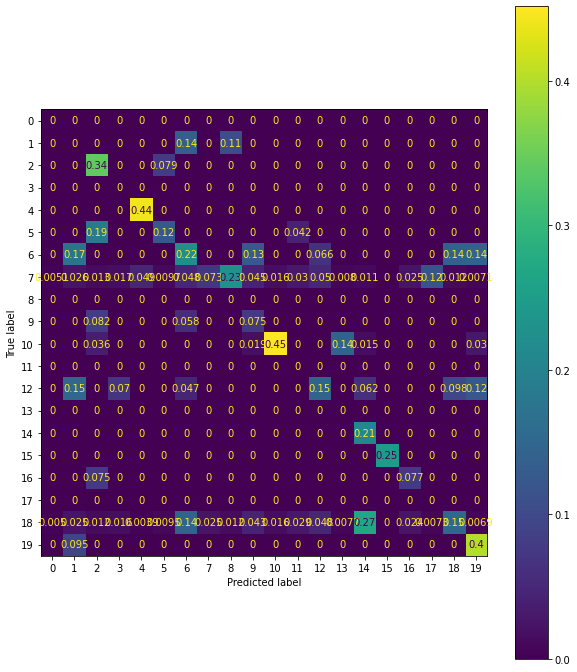

In [18]:
tfidf_candidates = tfidf_model.transform(X_test.iloc[idxs]['product_description'])
tfidf_queries = tfidf_model.transform(X_test.iloc[idxs]['search_term'])
y_pred_rand = cosim(tfidf_queries, tfidf_candidates)


ConfusionMatrixDisplay(y_pred_rand).plot()
fig = plt.gcf()
fig.set_size_inches(10, 12)
plt.show()

## Resume Dataset - 1

In [19]:
with open(os.path.join(DATASETS_HOME, 'resume-corpus/skills_it.txt'), 'r') as f:
    jds = f.read()

In [20]:
job_descriptions = {}

for i, jd in enumerate(jds.split('::::::\n::::::\n')):
    # first occurrence of ':::'
    idx1 = jd.find(':::')
    idx2 = jd.find(':::', idx1+3)
    role = jd[idx1+3: idx2].split(';')[0]
    job_descriptions[role] = role + ' ' + jd[idx2+3:]

In [21]:
# all the text files
files = glob.glob(os.path.join(DATASETS_HOME, 'resume-corpus/resumes_corpus/*.txt'))
role_info = []
for file in files:
    with open(file, encoding='latin-1', errors='replace') as f:
        role_info.append(f.read())

## Add RAKE

In [23]:
from rake_nltk import Rake
r = Rake()

r.extract_keywords_from_text(role_info[0])
query = r.get_ranked_phrases_with_scores()

r.extract_keywords_from_text(list(job_descriptions.values())[0])
candidate = r.get_ranked_phrases_with_scores()

In [24]:
from typing import List

def nucleus_sampling(freq: List[tuple], topp):
    max_ = sum(map(lambda x: x[0], freq))
    result = []
    cum_prob = 0.0 
    i = 0
    while cum_prob < topp:
        result.append(freq[i])
        cum_prob += freq[i][0] / max_
        i += 1
    return result

In [32]:
topp_candidate = nucleus_sampling(candidate, 0.6)

In [26]:
query

[(64.16666666666666,
  'paycheck processing help desk manager friend family health center'),
 (48.333333333333336, 'c ++, c ++, html additional information areas'),
 (46.62698412698412,
  'business needs identification hippa technical skills operating systems'),
 (44.766666666666666,
  'operations specialist chicago low income housing trust fund'),
 (41.53333333333334, 'chicago low income housing trust fund chicago'),
 (39.37142857142857,
  'creating reports within electronic medical record systems'),
 (34.54040404040404,
  'november 2014 technical support supervisor verizon wireless'),
 (32.54040404040404, '16 technical support call center representatives'),
 (31.416666666666664, 'service sales rep cintas first aid'),
 (29.87878787878788, 'network administrator ii onepoint patient care'),
 (28.583333333333336, 'project management southern new hampshire university'),
 (27.57142857142857, 'managing electronic medical record systems'),
 (21.5, 'expertise effective communication team lead

In [69]:
topp_query = nucleus_sampling(query, 0.3)

In [29]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [30]:
def match_sentence(text1: List[str], text2: List[str], model):
    rep1 = model.encode(text1)
    rep2 = model.encode(text2)
    return cosine_similarity(rep1, rep2)

In [46]:
q = [topp_query[8][1]]
c = [topp_candidate[6][1]]
print(q, c)
match_sentence(q, c, model=model)

['service sales rep cintas first aid'] ['additional qualifications saint cloud high school saint cloud']


array([[0.11060853]], dtype=float32)

In [65]:
def set_to_set_match(query_kw, candidate_kw, model, threshold=0.6):
    relevant = []
    irrelevant = []
    query_list = list(map(lambda x: x[1], query_kw))
    candidate_list = list(map(lambda x: x[1], candidate_kw))
    scores = match_sentence(query_list, candidate_list, model=model)
    values = np.max(scores.T, axis=1)
    for i, val in enumerate(values):
        if val >= threshold:
            relevant.append((candidate_kw[i][1], val))
        else:
            irrelevant.append((candidate_kw[i][1], val))
    return relevant, irrelevant

In [68]:
rel, irrel = set_to_set_match(topp_query, topp_candidate, model, threshold=0.4)
print(rel)

RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.